In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date, time
import ssl
import urllib
import json
import matplotlib.pyplot as plt
import seaborn as sns
import operator

---

### Import the data

Trip data (already formatted and outliers have been removed, please refer to Preprocessing.ipynb)

In [2]:
df_bonn = pd.read_pickle("data/df_bonn.pickle")
df_essen = pd.read_pickle("data/df_essen.pickle")

In [3]:
# Create a weekday dictonary to show the weekday names in the plots
weekdays = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

Import API data

In [4]:
context = ssl._create_unverified_context()

def request(city_id):
    response = urllib.request.urlopen(f"https://api.nextbike.net/maps/nextbike-live.json?city={city_id}", context=context)
    response = response.read().decode("utf-8")
    return json.loads(response)

bonn_json = request(547)["countries"][0]["cities"][0] # Bonn city ID at NextBike is 547
essen_json = request(133)["countries"][0]["cities"][0] # Essen city ID at NextBike ist 133

In [5]:
# Use as center points for maps:
bonn_center = np.array([bonn_json["lat"], bonn_json["lng"]])
essen_center = np.array([essen_json["lat"], essen_json["lng"]])

Weather data

In [6]:
# Import weather data
df_weather_bonn = pd.read_pickle("data/df_weather_bonn.pickle")
df_weather_essen = pd.read_pickle("data/df_weather_essen.pickle")

---

In [7]:
df_bonn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329311 entries, 0 to 329310
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   day            329311 non-null  object         
 1   time           329311 non-null  object         
 2   b_number       329311 non-null  int64          
 3   city           329311 non-null  object         
 4   trip_duration  329311 non-null  timedelta64[ns]
 5   timestamp      329311 non-null  datetime64[ns] 
 6   weekday        329311 non-null  int64          
 7   hour           329311 non-null  int64          
 8   season         329311 non-null  int64          
 9   orig           329311 non-null  object         
 10  dest           329311 non-null  object         
dtypes: datetime64[ns](1), int64(4), object(5), timedelta64[ns](1)
memory usage: 27.6+ MB


# KPI Most popular ridetimes

## Plot for Bonn

(0.0, 2.0)

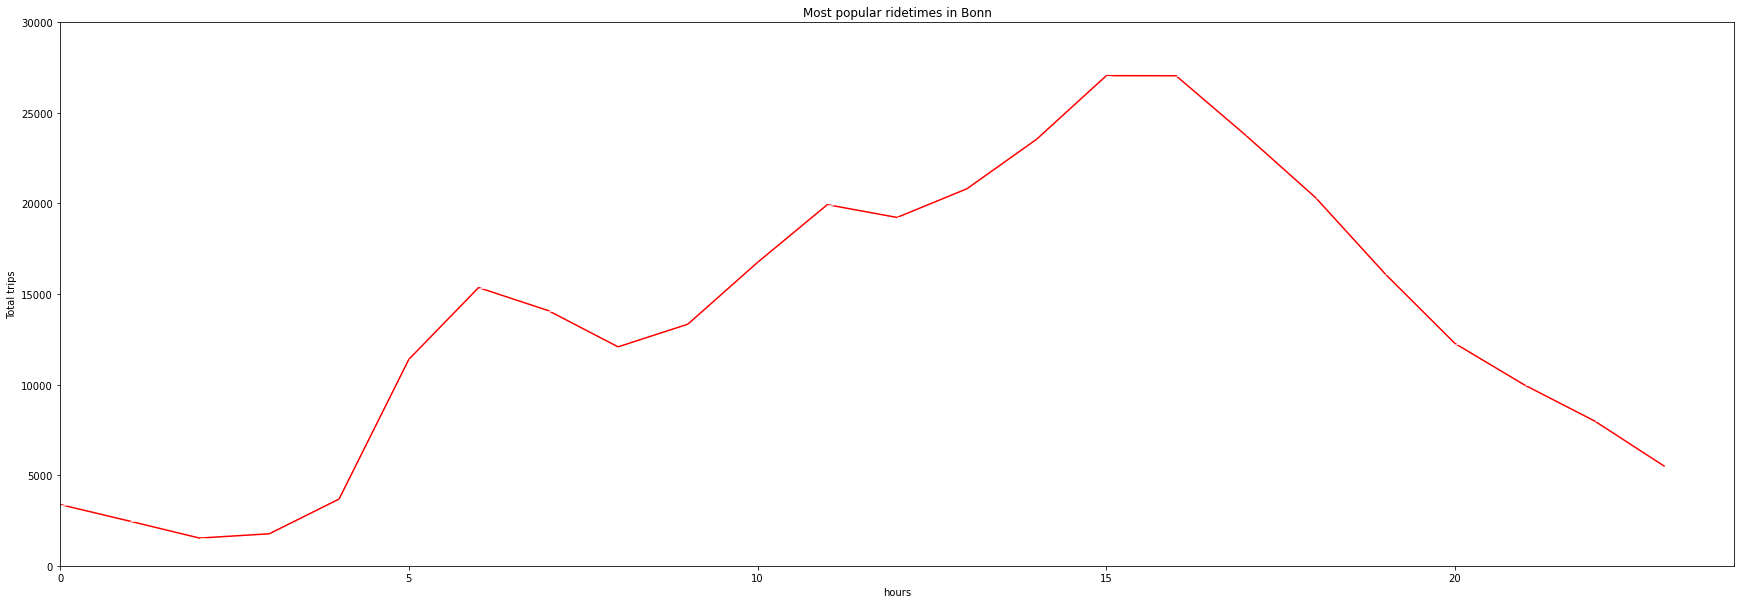

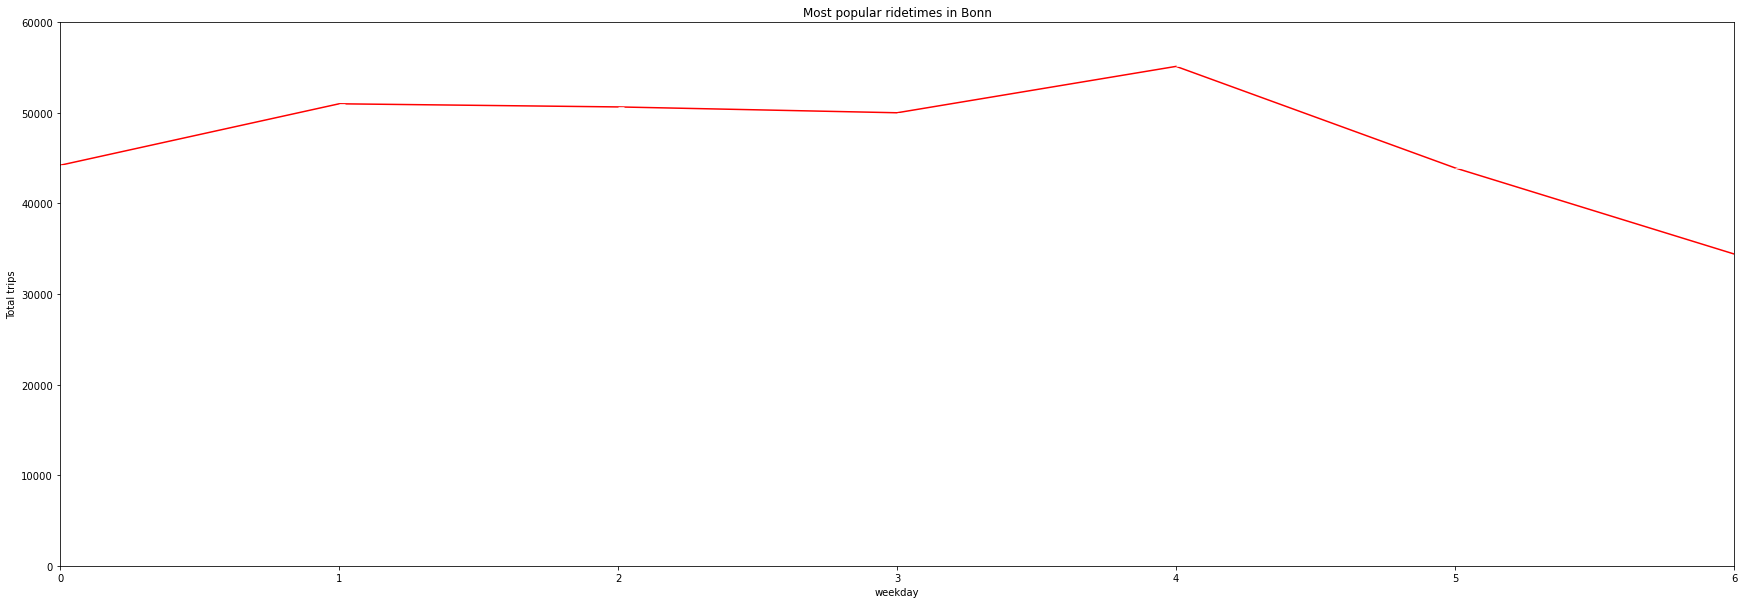

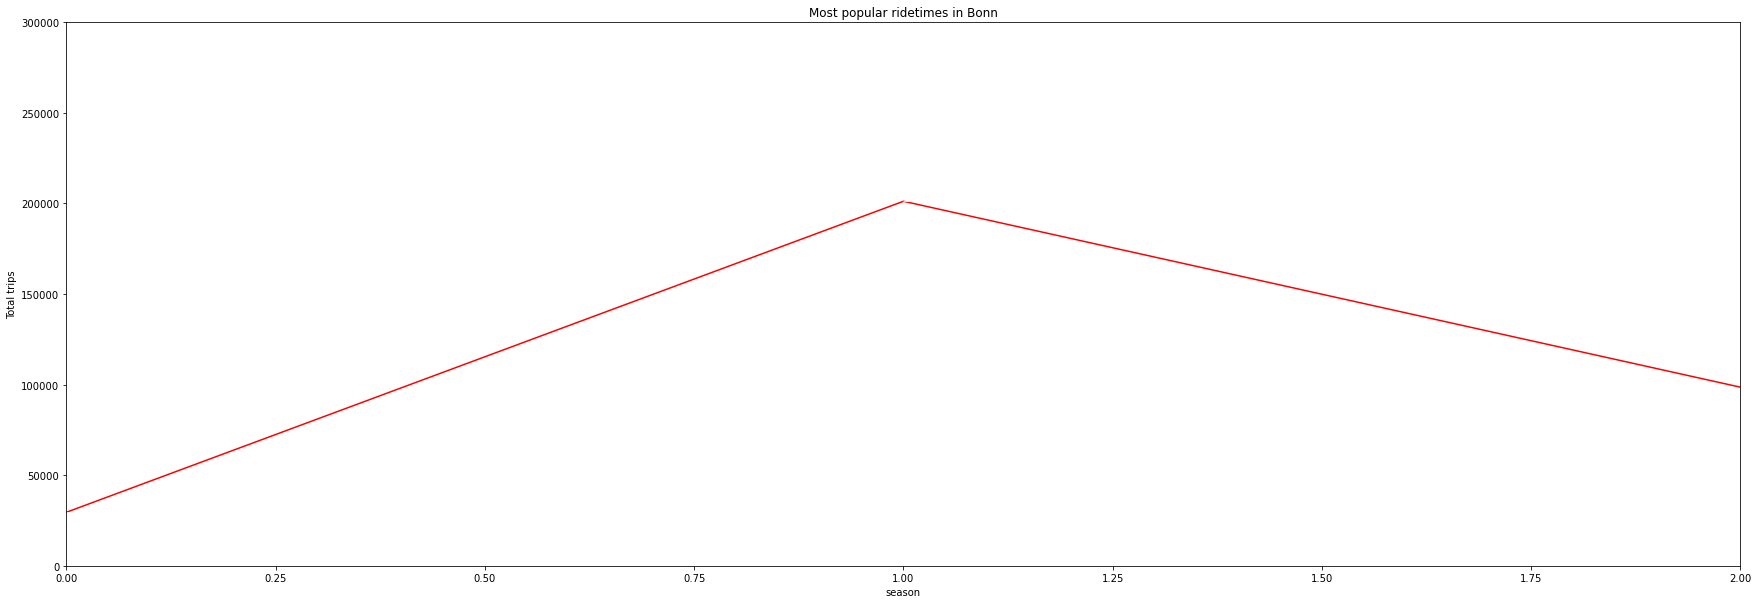

In [44]:
df = df_bonn.groupby(['hour']).size().reset_index(name='total_trips')
df_w = df_bonn.groupby(['weekday']).size().reset_index(name='total_trips')
df_s = df_bonn.groupby(['season']).size().reset_index(name='total_trips')



fig, ax = plt.subplots(figsize=(30,10))
ax = sns.lineplot (x = 'hour', y= 'total_trips', data = df,color = 'red', ci = False , marker = True)
ax.set_xlabel('hours')
ax.set_ylabel('Total trips')
ax.set_title('Most popular ridetimes hourly in Bonn')
ax.set_ylim([0,30000])
ax.set_xlim([0,24])

fig, ax1 = plt.subplots(figsize=(30,10))
ax1 = sns.lineplot (x = 'weekday', y= 'total_trips', data = df_w,color = 'red', ci = False , marker = True)
ax1.set_xlabel('weekday')
ax1.set_ylabel('Total trips')
ax1.set_title('Most popular ridetimes weekly in Bonn')
ax1.set_ylim([0,60000])
ax1.set_xlim([0,6])

fig, ax2 = plt.subplots(figsize=(30,10))
ax2 = sns.lineplot (x = 'season', y= 'total_trips', data = df_s,color = 'red', ci = False , marker = True)
ax2.set_xlabel('season')
ax2.set_ylabel('Total trips')
ax2.set_title('Most popular ridetimes seasonly in Bonn')
ax2.set_ylim([0,300000])
ax2.set_xlim([0,2])

## Plot for Essen 

(0.0, 2.0)

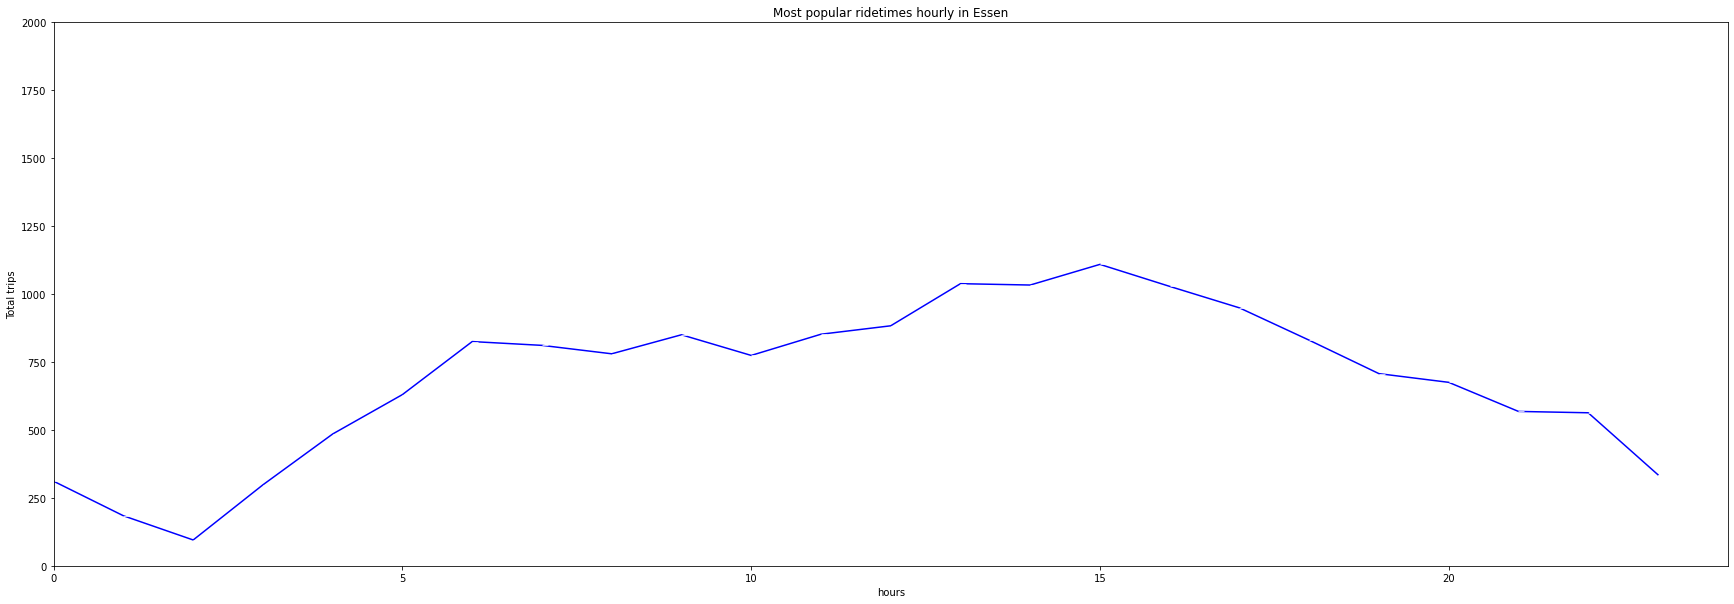

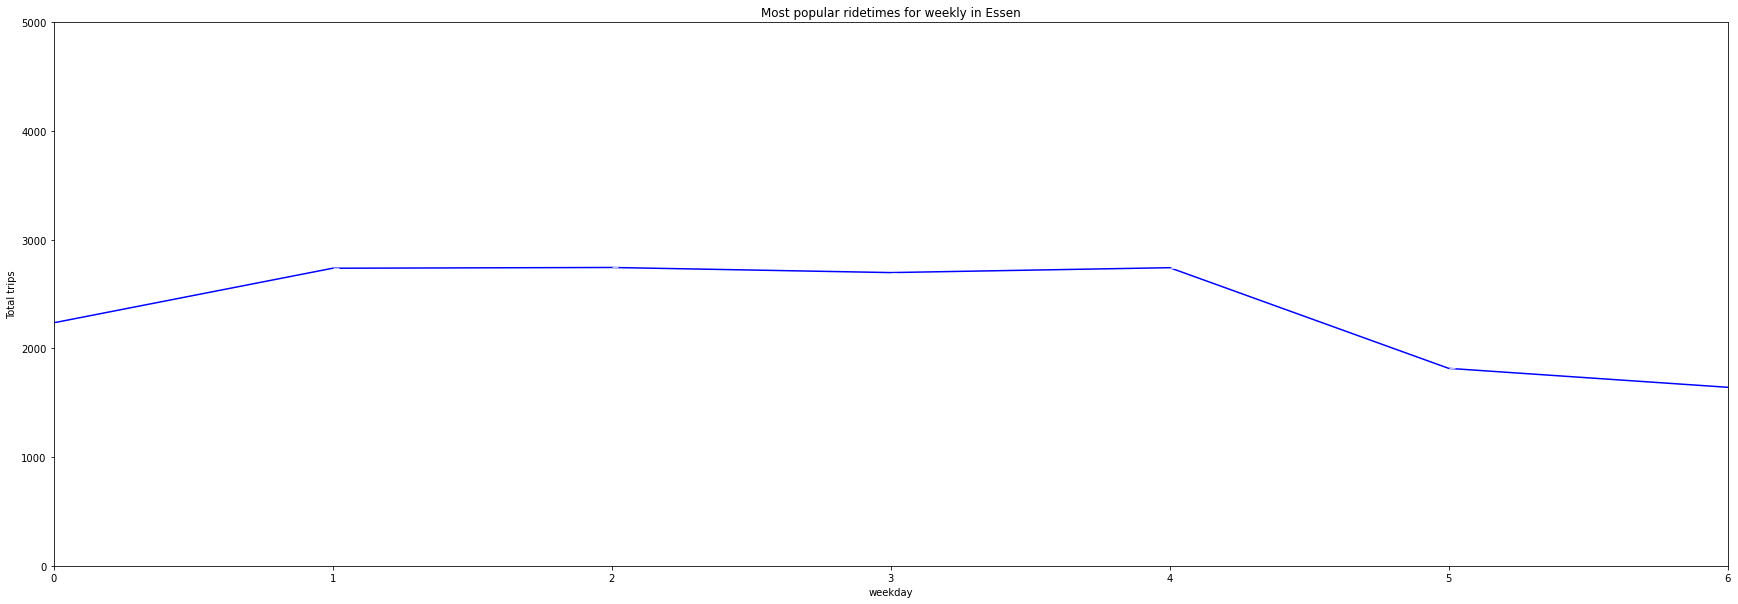

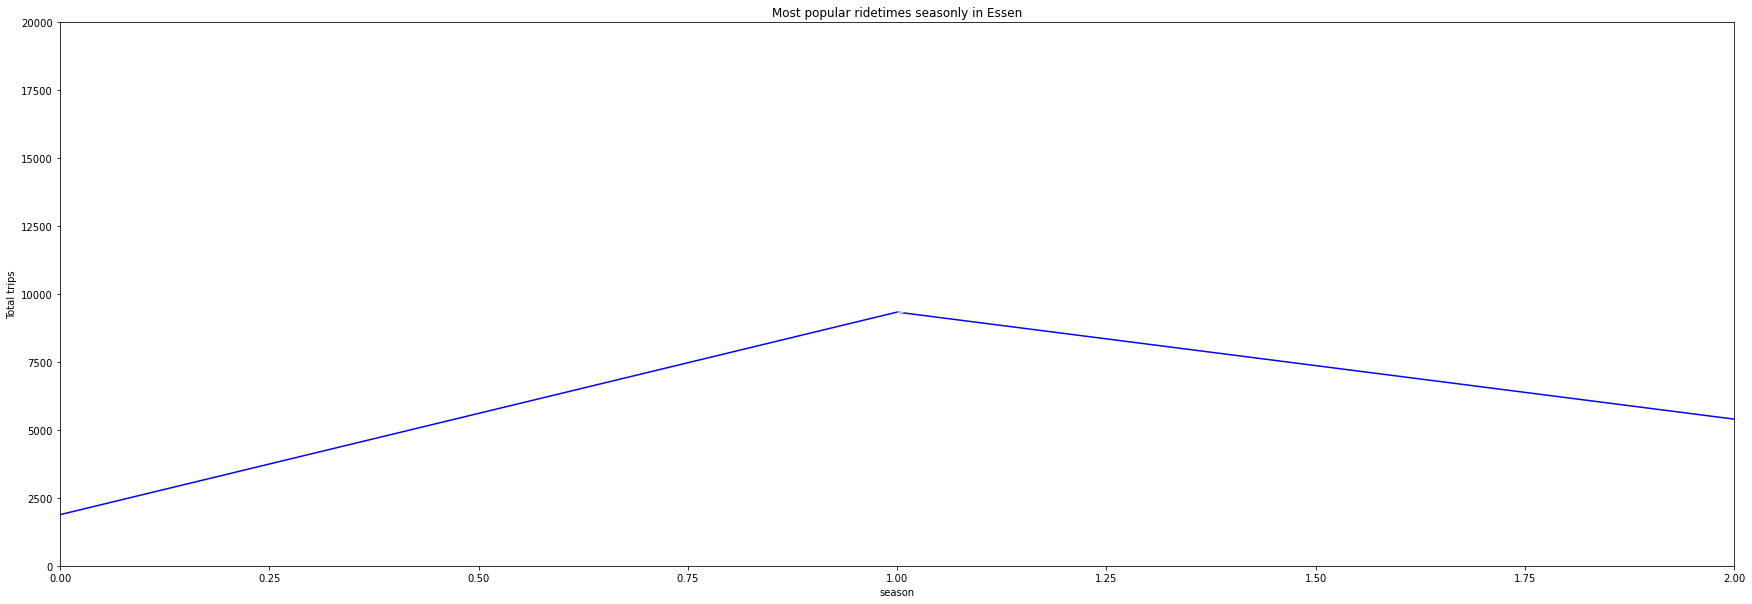

In [50]:
ef = df_essen.groupby(['hour']).size().reset_index(name='total_trips')
ef_w = df_essen.groupby(['weekday']).size().reset_index(name='total_trips')
ef_s = df_essen.groupby(['season']).size().reset_index(name='total_trips')



fig, ax = plt.subplots(figsize=(30,10))
ax = sns.lineplot (x = 'hour', y= 'total_trips', data = ef,color = 'blue' ,ci = False , marker = True)
ax.set_xlabel('hours')
ax.set_ylabel('Total trips')
ax.set_title('Most popular ridetimes hourly in Essen')
ax.set_ylim([0,2000])
ax.set_xlim([0,24])


fig, ax1 = plt.subplots(figsize=(30,10))
ax1 = sns.lineplot (x = 'weekday', y= 'total_trips', data = ef_w,color = 'blue', ci = False , marker = True)
ax1.set_xlabel('weekday')
ax1.set_ylabel('Total trips')
ax1.set_title('Most popular ridetimes for weekly in Essen')
ax1.set_ylim([0,5000])
ax1.set_xlim([0,6])

fig, ax2 = plt.subplots(figsize=(30,10))
ax2 = sns.lineplot (x = 'season', y= 'total_trips', data = ef_s,color = 'blue', ci = False , marker = True)
ax2.set_xlabel('season')
ax2.set_ylabel('Total trips')
ax2.set_title('Most popular ridetimes seasonly in Essen')
ax2.set_ylim([0,20000])
ax2.set_xlim([0,2])

### Plot for Essen and Bonn

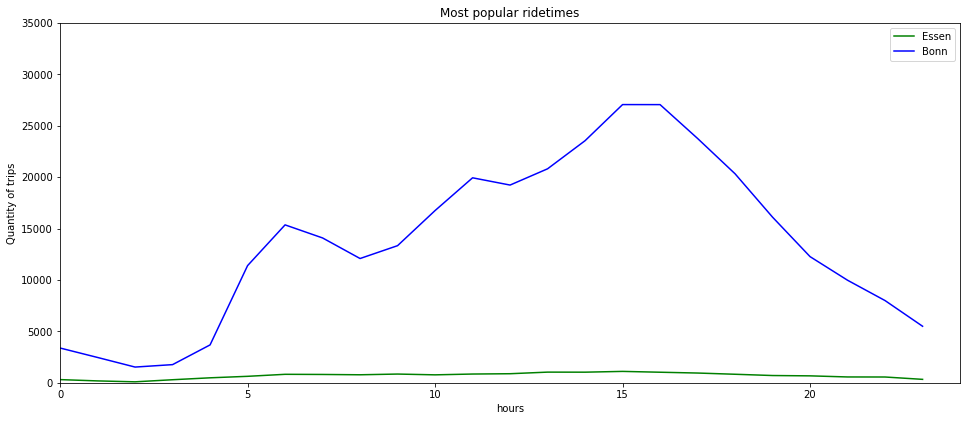

In [13]:
Figure_essen = plt.figure(figsize=(25,10))
ax_1 = Figure_essen.add_axes([0.5,0.5,0.5,0.5])
test_col = df_essen.groupby("hour").size()
test_col1 = df_bonn.groupby("hour").size()


ax_1.plot(test_col,'g-',label='Essen')
ax_1.plot(test_col1,'b-',label='Bonn')
ax_1.set_xlabel('hours')
ax_1.set_ylabel('Quantity of trips')
ax_1.set_title('Most popular ridetimes')
ax_1.set_ylim([0,35000])
ax_1.set_xlim([0,24])
ax_1.legend(loc=0)

# KPI with Violinplot

In [18]:
df_bonn['Rides'] = 1
df_essen['Rides'] = 1

#df_bonn['cumR'] = df_bonn.groupby('hour').cumsum()
#groupby(['Category','scale']).


#df_bonn.iloc[2,df_bonn.columns.get_loc('Rides')] = 2

#for x in range(0,1):
#    size = df_bonn[df_bonn.hour == x].shape[0]
#    for y in range(0,size):
#        df_bonn[df_bonn.hour == x].iat[y,11] = y

#d = df_bonn.groupby(['hour']).cumsum()
#df_bonn_cm = pd.DataFrame(data=d)

#df_bonn.groupby(['hour']).cumsum()
#df_bonn['no_cumulative'] = df_bonn.groupby(['hour']).apply(lambda x: x.cumsum())


df_bonn['no_csum'] = df_bonn.groupby(['hour'])['Rides'].cumsum()
df_essen['no_csum'] = df_essen.groupby(['hour'])['Rides'].cumsum()



#de = df_essen.groupby(['hour']).cumsum()
#df_essen_cm = pd.DataFrame(data=de)

df_bonn.to_excel('bonn_data.xlsx')
df_essen.to_excel('essen_data.xlsx')

In [19]:
df_concat = pd.read_excel (r'/Users/hasbisevim/Documents/GitHub/anacondas/bonn_essen_data.xlsx')



(0.0, 24.0)

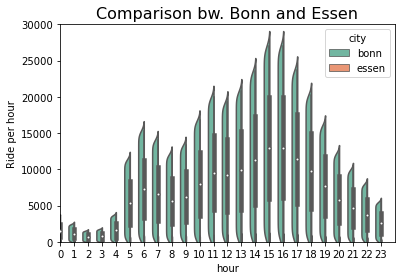

In [51]:
ax= sns.violinplot(x="hour", y="no_csum", hue="city", data=df_concat, palette="Set2", split=True,scale="count")
ax.set_title('Comparison bw. Bonn and Essen', fontsize=16);
ax.set_ylabel('Ride per hour')
ax.set_ylim([0,30000])
ax.set_xlim([0,24])

(0.0, 6.0)

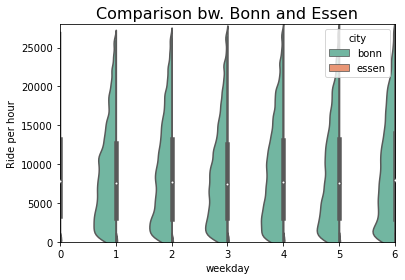

In [52]:
ax= sns.violinplot(x="weekday", y="no_csum", hue="city", data=df_concat, palette="Set2", split=True,scale="count")
ax.set_title('Comparison bw. Bonn and Essen', fontsize=16);
ax.set_ylabel('Ride per hour')
ax.set_ylim([0,28000])
ax.set_xlim([0,6])

(0.0, 24.0)

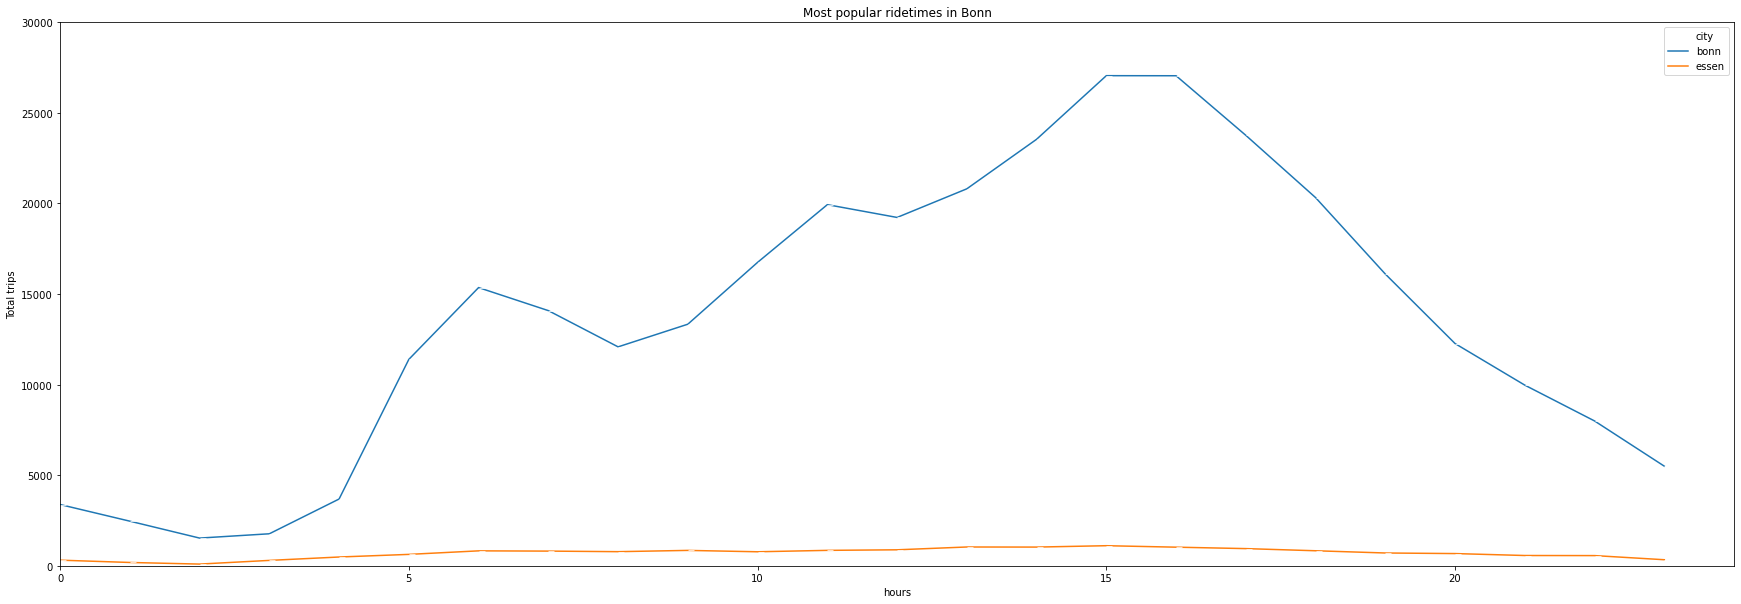

In [49]:
df = df_concat.groupby(['hour', 'city']).size().reset_index(name='total_trips')


fig, ax = plt.subplots(figsize=(30,10))
ax = sns.lineplot (x = 'hour', y= 'total_trips',hue= 'city', data = df, ci = False , marker = True)
ax.set_xlabel('hours')
ax.set_ylabel('Total trips')
ax.set_title('Most popular ridetimes in Bonn')
ax.set_ylim([0,30000])
ax.set_xlim([0,24])